### Линейная регрессия

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)
x_obj = np.random.uniform(0, 1, size = 30)
y_obj = np.cos(1.5 * np.pi * x_obj) + np.random.normal(scale = 0.1,
                                                       size = x_obj.shape)

Coefficients: [-1.96635465]
Mean squared error: 0.18847139542733252
Mean absolute error: 0.3620659366964296
Coefficient of determination: 0.5884514107415451


Coefficients: [  0.0697848  -14.40575795  18.10888186  -4.68598787]
Mean squared error: 0.002404033627714056
Mean absolute error: 0.04454808890505554
Coefficient of determination: 0.9947505209171273


Coefficients: [-6.81089748e+02  6.70628390e+04 -2.74266735e+06  5.98179682e+07
 -8.07195678e+08  7.35070278e+09 -4.76177171e+10  2.26596089e+11
 -8.06361925e+11  2.15791258e+12 -4.30543259e+12  6.19617751e+12
 -5.81983833e+12  2.12487793e+12  2.99811651e+12 -5.95762149e+12
  5.24429491e+12 -2.71058612e+12  7.96284356e+11 -1.03402366e+11]
Mean squared error: 536104.4679752094
Mean absolute error: 110.16183817389057
Coefficient of determination: -1170643.685842631




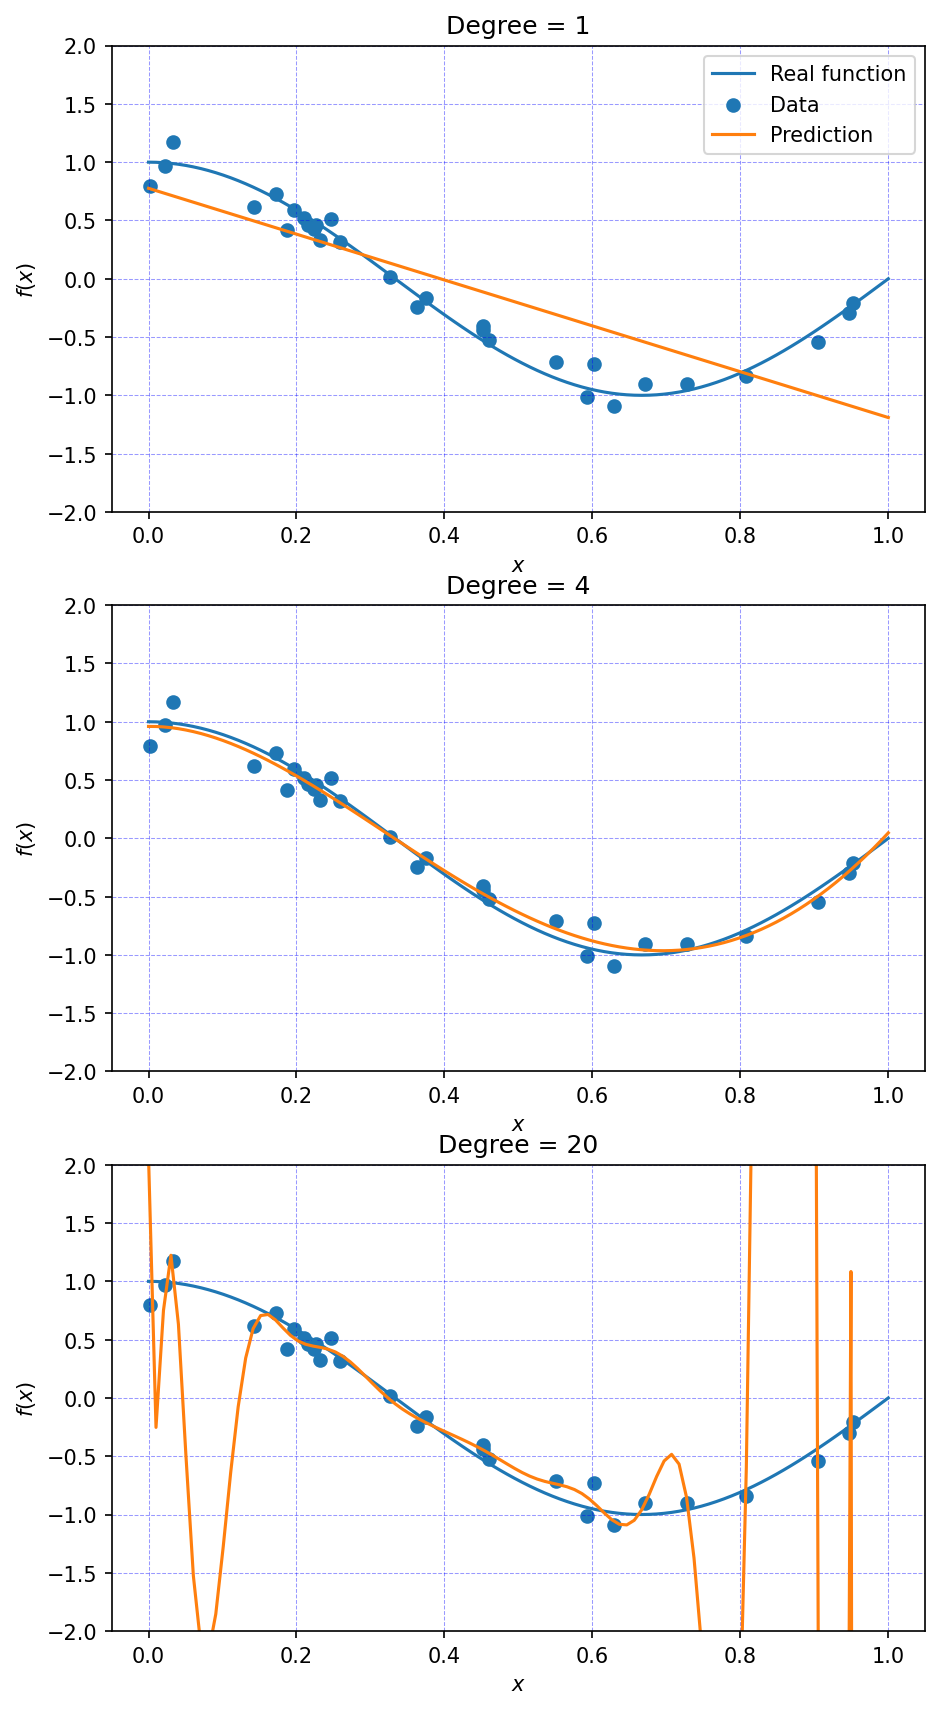

In [3]:
from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize = (7, 14), nrows = 3, dpi = 150)
for i, degree in enumerate([1, 4, 20]):
    X_obj = PolynomialFeatures(degree, include_bias = False).fit_transform(x_obj[:, None])
    X = PolynomialFeatures(degree, include_bias = False).fit_transform(x[:, None])
    regression = LinearRegression().fit(X_obj, y_obj)
    y_pred = regression.predict(X)    
    print('====================================================')
    print(f'Coefficients: {regression.coef_}')
    print(f'Mean squared error: {mean_squared_error(y, y_pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y, y_pred)}')
    print(f'Coefficient of determination: {r2_score(y, y_pred)}')
    print('====================================================')
    print('\n')    
    axs[i].plot(x, y, label = 'Real function')
    axs[i].scatter(x_obj, y_obj, label = 'Data')
    axs[i].plot(x, y_pred, label = 'Prediction')
    if i == 0:
        axs[i].legend()    
    axs[i].set_title(f'Degree = {degree}')
    axs[i].set_xlabel('$x$')
    axs[i].set_ylabel('$f(x)$')
    axs[i].set_ylim(-2, 2)    
    axs[i].grid(color = 'b', linestyle = '--', linewidth = .5, alpha = .4)